In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyforest
from pyforest import *

In [2]:
data=pd.read_csv('C:/Users/aksha/Desktop/creditcard.csv')

<IPython.core.display.Javascript object>

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
df=data.loc[:,["Time","Amount","Class"]]

In [8]:
df.describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [9]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

VISUALIZATION

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\aksha\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


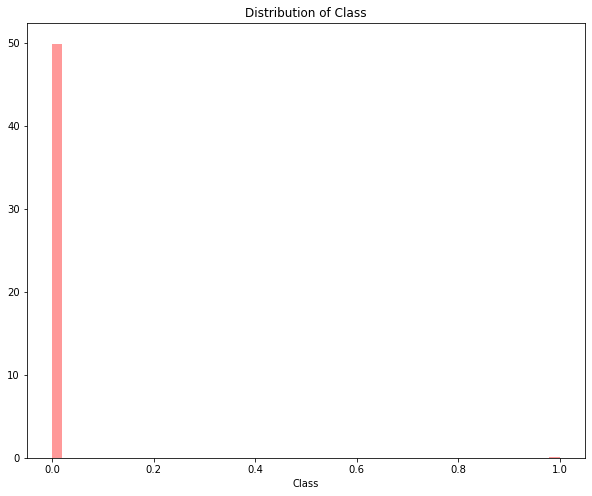

In [10]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Class")
sns.distplot(df["Class"],color="red")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

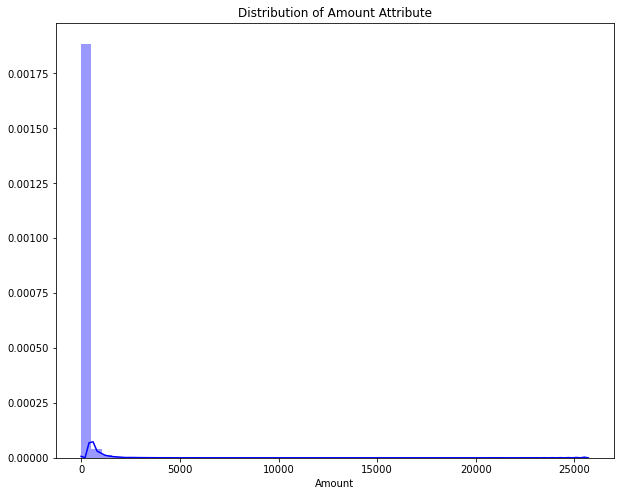

In [11]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Amount Attribute")
sns.distplot(df["Amount"],color='blue')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

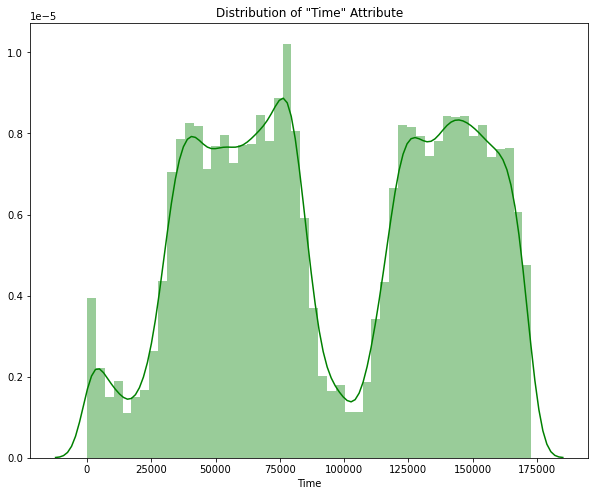

In [12]:
plt.figure(figsize=(10,8))
plt.title('Distribution of "Time" Attribute')

sns.distplot(df['Time'],color='green');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D502527520>,
      dtype=object)

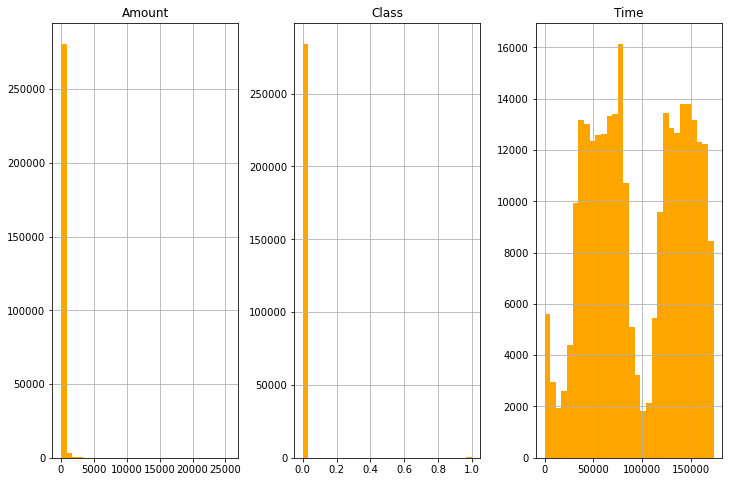

In [13]:
df.hist(bins=30,figsize=(12,8),layout=(1,3),color='orange')

In [14]:
df.corr()

,Time,Amount,Class
Time,1.000000,-0.010596,-0.012323
Amount,-0.010596,1.000000,0.005632
Class,-0.012323,0.005632,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

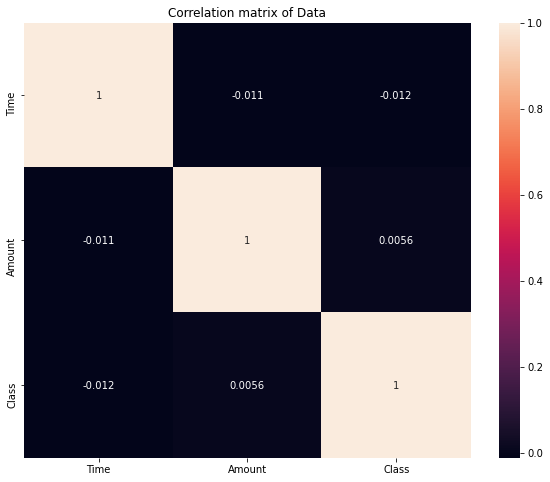

In [15]:
plt.figure(figsize=(10,8))
plt.title("Correlation matrix of Data")
sns.heatmap(df.corr(),annot=True)

In [16]:
#Corelation among other variables

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

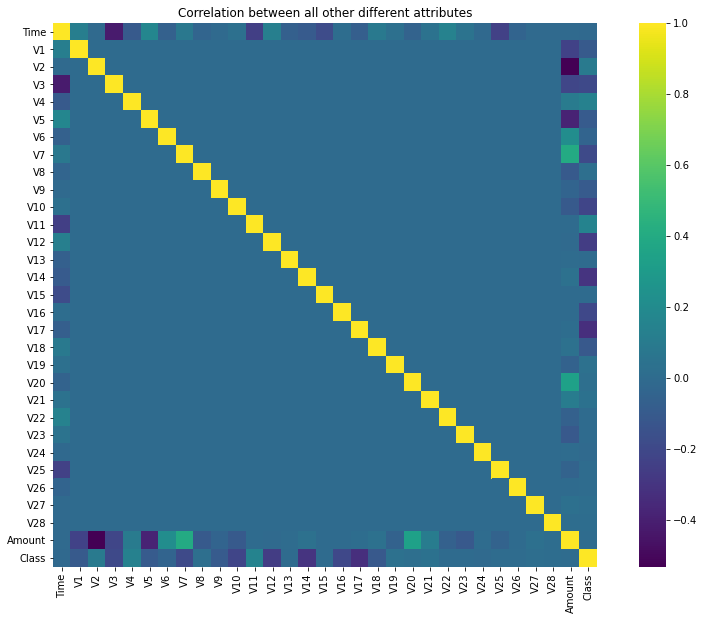

In [17]:
plt.figure(figsize=(15,10))

sns.heatmap(data.corr(), vmax=1, square=True,cmap='viridis')
plt.title('Correlation between all other different attributes')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

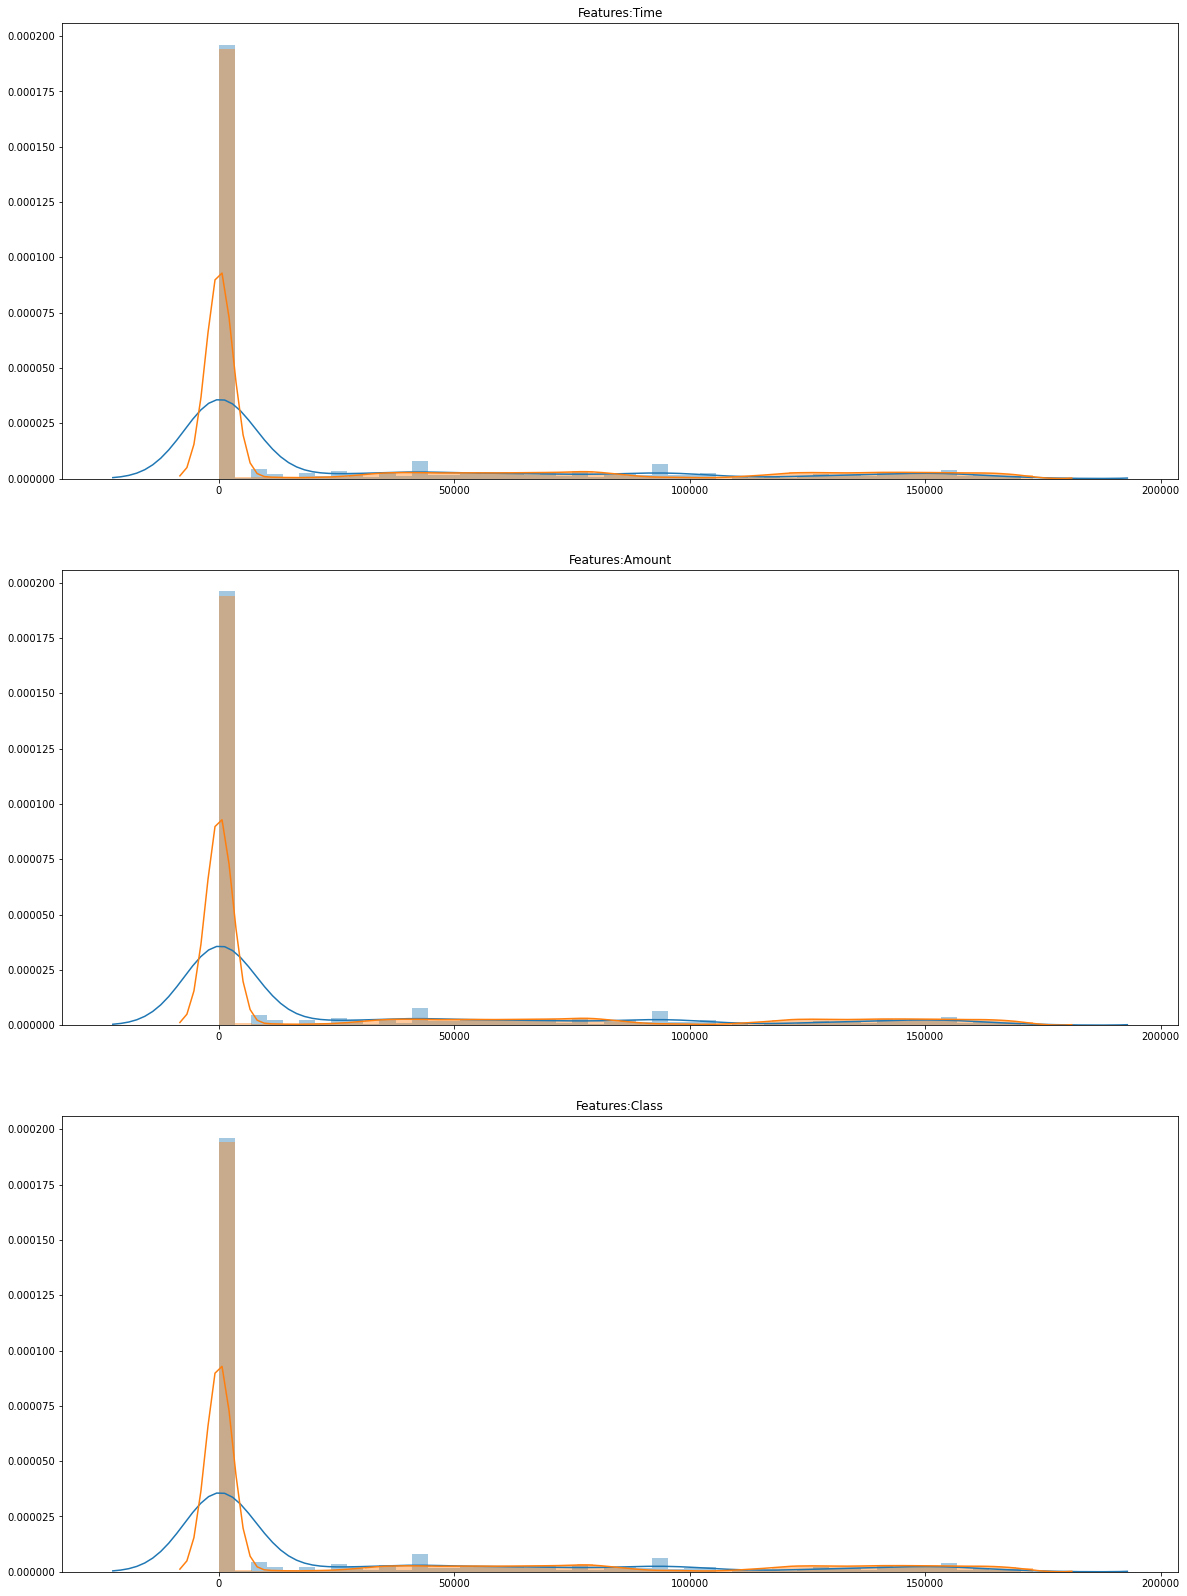

In [18]:
plt.figure(figsize=(20,30*10))
import matplotlib.gridspec as gridspec
features=df.iloc[:,0:30].columns
gs = gridspec.GridSpec(30, 1)
for i, feature in enumerate(df[features]):
    ax=plt.subplot(gs[i])
    sns.distplot(data[features][df.Class==1],bins=50)
    sns.distplot(data[features][df.Class==0],bins=50)
    ax.set_xlabel('')
    ax.set_title('Features:' + str(feature))
plt.show()

In [19]:
df.shape

(284807, 3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

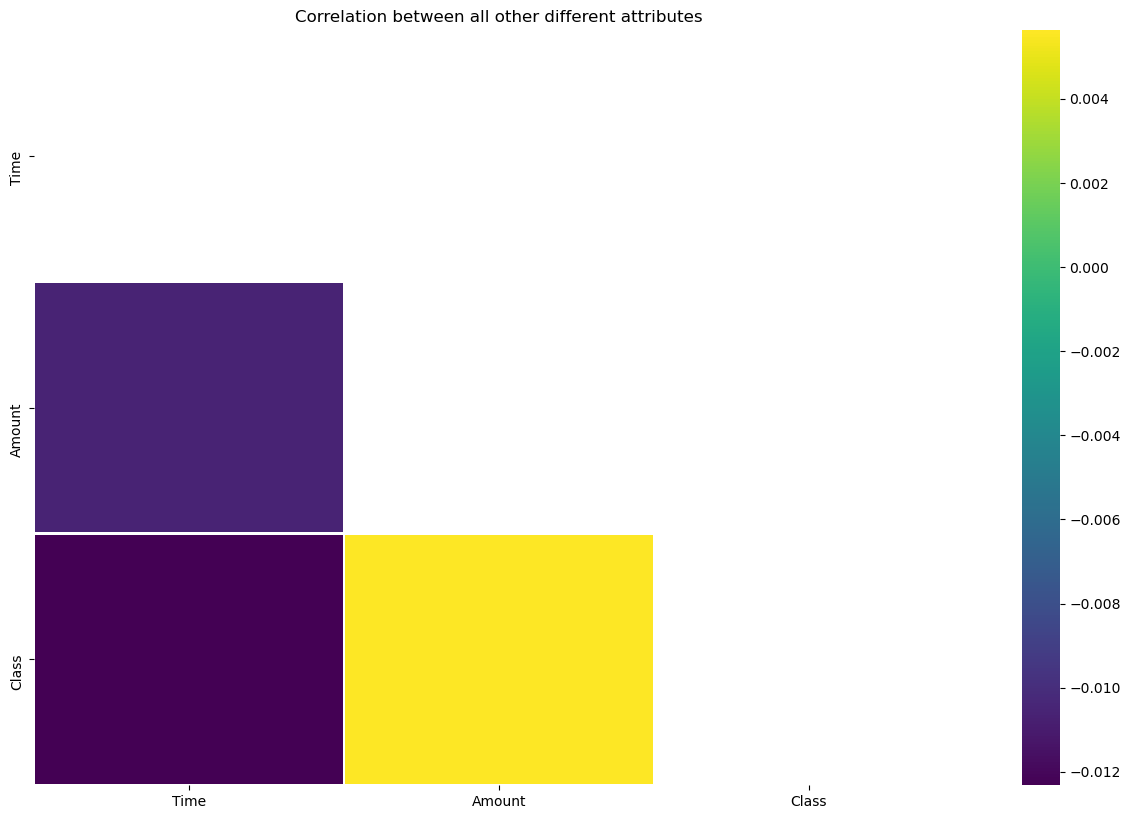

In [20]:
 mask = np.triu(np.ones_like(df.corr(),dtype=bool)) # "np.triu" : Return a copy of a matrix with the elements below the k-th diagonal zeroed.
 plt.figure(dpi=100,figsize=(15,10))
 sns.heatmap(df.corr(),yticklabels=True,mask=mask,cmap='viridis',annot=False, lw=1)
 plt.title('Correlation between all other different attributes')
 plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Data Of Fraud vs NotFraud')

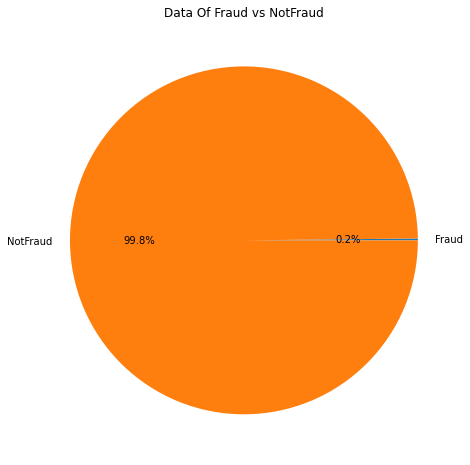

In [21]:
fraud=len(df[df["Class"]==1])
notfraud=len(data[data["Class"]==0])

labels="Fraud","NotFraud"
sizes=[fraud,notfraud]

plt.figure(figsize=(10,8))
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.title("Data Of Fraud vs NotFraud")



In [22]:
#Preparing Our Data

In [23]:
x=data.drop("Class",axis=1)
y=data["Class"]

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12)

<IPython.core.display.Javascript object>

In [25]:
#Concatinating our training data together
X=pd.concat([x_train,y_train],axis=1)
X.head()

<IPython.core.display.Javascript object>

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
164930,117084.0,2.185197,-1.235302,-1.606691,-2.266612,-0.831461,-0.968472,-0.613375,-0.146921,0.777059,...,-0.039952,0.559971,-0.051697,-0.460034,0.216956,0.109964,0.000807,-0.077146,15.17,0
242067,151321.0,-1.799115,1.310622,0.944067,-1.203469,0.955353,-2.129920,1.471111,-0.639764,0.178716,...,0.116171,0.687837,-0.726181,0.878750,1.138202,-0.258607,-0.184204,0.034433,8.65,0
162413,115095.0,1.822217,-0.674358,-0.630222,-0.103878,0.089674,1.306553,-0.859095,0.523853,0.850845,...,-0.060967,-0.115734,0.390643,-1.648715,-0.841107,0.399405,0.000496,-0.065007,37.03,0
64671,51254.0,-0.003829,0.975379,0.720532,0.731837,0.025738,0.072059,-0.081115,-1.549084,-0.644297,...,1.558706,-0.446861,-0.068159,0.205777,1.228065,-0.256967,0.102724,0.091999,9.99,0
80610,58564.0,0.499167,-2.135992,1.260784,0.466117,-2.325110,0.395085,-0.999612,0.251452,0.136055,...,-0.122210,-0.442920,-0.250216,0.565997,-0.023175,0.515495,-0.022302,0.085638,376.50,0


In [26]:
#Using Dummy Classifier to verify the inbalance data Output

In [27]:
from sklearn.dummy import DummyClassifier

In [28]:
#Dummy classifier will end up only predicting 0
dummy=DummyClassifier(strategy="most_frequent").fit(x_train,y_train)
dummypred=dummy.predict(x_test)

In [29]:
#Checking unique predicted labels
print("unique predicted labels:",np.unique(dummypred))

from sklearn.metrics import accuracy_score
#checking Accuracy
print("test score:",accuracy_score(y_test,dummypred))

<IPython.core.display.Javascript object>

unique predicted labels: [0]
test score: 0.9982584758855089


In [30]:
#Upsampling

In [31]:
#seperate minority and majority classes
from sklearn.utils import resample

notfraud=X[X["Class"]==0]
fraud=X[X["Class"]==1]

#Upsample Minority
fraud_upsample=resample(fraud,
                       replace=True,  #Sample with replacement
                       n_samples=len(notfraud),  #match number in majority class
                       random_state=65)

#Combine majority and unsampled minority
upsampled=pd.concat([notfraud,fraud_upsample])

#Check the new Class Counts
upsampled.Class.value_counts()

<IPython.core.display.Javascript object>

1    213237
0    213237
Name: Class, dtype: int64

In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver="liblinear")

x_train=upsampled.drop("Class",axis=1)
y_train=upsampled["Class"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=25)

lr.fit(x_train,y_train)
upsampled_pred=lr.predict(x_test)

accuracy_score(y_test,upsampled_pred)

<IPython.core.display.Javascript object>

0.998806213308615

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

print("Logistic Regression Classification report")
print("..."*10)
print(classification_report(y_test,upsampled_pred))

Logistic Regression Classification report
..............................
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71069
           1       0.72      0.59      0.65       133

    accuracy                           1.00     71202
   macro avg       0.86      0.79      0.82     71202
weighted avg       1.00      1.00      1.00     71202



In [34]:
pd.DataFrame(confusion_matrix(y_test,upsampled_pred))

<IPython.core.display.Javascript object>

,0,1
0,71039,30
1,55,78


In [35]:
#Downsapling
notfraud_downsampled=resample(notfraud,
                             replace=False,
                             n_samples=len(fraud),random_state=65)

In [36]:
downsampled=pd.concat([notfraud_downsampled,fraud])

<IPython.core.display.Javascript object>

In [37]:
downsampled.Class.value_counts()

1    368
0    368
Name: Class, dtype: int64

In [38]:
x_train=downsampled.drop("Class",axis=1)
y_train=downsampled["Class"]

lr=LogisticRegression(solver="liblinear").fit(x_train,y_train)
downsampled_pred=lr.predict(x_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

print("Logistic Regression Classification report")
print("..."*10)
print(classification_report(y_test,downsampled_pred))

Logistic Regression Classification report
..............................
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71069
           1       0.05      0.92      0.09       133

    accuracy                           0.96     71202
   macro avg       0.52      0.94      0.53     71202
weighted avg       1.00      0.96      0.98     71202



In [40]:
pd.DataFrame(confusion_matrix(y_test,downsampled_pred))

<IPython.core.display.Javascript object>

,0,1
0,68522,2547
1,10,123


In [41]:
#Generate Synthetic Samples using Smote

In [42]:
from imblearn.over_sampling import  SMOTE

In [43]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [44]:
x=df.drop("Class",axis=1)
y=df["Class"]

In [45]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.25,random_state=26)

<IPython.core.display.Javascript object>

In [46]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\aksha\anaconda3\lib\site-packages (0.8.0)
Note: you may need to restart the kernel to use updated packages.


In [47]:
sm=SMOTE(random_state=123)
x_train1,y_train1=sm.fit_sample(x_train1,y_train1)

In [48]:
smotelr=LogisticRegression(solver="liblinear")

In [49]:
smotelr.fit(x_train1,y_train1)
smote_pred=smotelr.predict(x_test1)
smote_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
accuracy_score(y_test1,smote_pred)

0.8681919047217774

In [51]:
pd.DataFrame(confusion_matrix(y_test1,smote_pred))

<IPython.core.display.Javascript object>

,0,1
0,61790,9280
1,105,27


In [52]:
#Using Random forest
from sklearn.ensemble import RandomForestClassifier

In [53]:
randf=RandomForestClassifier(n_estimators=10).fit(x_train,y_train)

In [54]:
randf_pred=randf.predict(x_test)

In [55]:
accuracy_score(y_test,randf_pred)

0.9658577006263869

In [56]:
pd.DataFrame(confusion_matrix(y_test,randf_pred))

<IPython.core.display.Javascript object>

,0,1
0,68643,2426
1,5,128


In [57]:
#Using naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
gnb=GaussianNB()

In [60]:
gnb.fit(x_train,y_train)

GaussianNB()

In [61]:
gnb_pred=gnb.predict(x_test)

In [62]:
accuracy_score(y_test,gnb_pred)

0.9864610544647622

In [63]:
pd.DataFrame(confusion_matrix(y_test,gnb_pred))

<IPython.core.display.Javascript object>

,0,1
0,70135,934
1,30,103


In [64]:
#Run CrossValidation with 5 folds

In [65]:
from sklearn.model_selection import GridSearchCV

In [67]:
# # Run CV with 5 folds (SVM)

C = [1]
gammas = [0.001, 0.1]
param_grid = dict(C=C, gamma=gammas)

svm1 = svm.SVC(kernel='rbf', probability=True)
svm_grid = GridSearchCV(svm1, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
svm_grid.fit(x_train, y_train)

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1], 'gamma': [0.001, 0.1]}, scoring='roc_auc',
             verbose=10)

In [68]:
svm_pred=svm_grid.predict(x_test)

In [69]:
accuracy_score(y_test,svm_pred)

0.9471924945928485